# Text mining LOTR

In [29]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/woodoooo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/woodoooo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/woodoooo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization

In [30]:
myfile = open('Key events of the 20th century_without references.txt', encoding='utf-8') 

In [31]:
# Import txt file

with open('Key events of the 20th century_without references.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', ' ').replace('\t', ' ')

In [32]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide      Navigation     Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us        Contribute     HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages                    Search            Search                       Appearance                 Donate  Create account  Log in         Personal tools      Donate Create account Log in        Pages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914–1918)           1.2 Spanish flu       1.2.1 Russian Revolution and communism           1.3 Between the wars       1.3.1 Economic depression         

In [33]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.2', 'Spanish', 'flu', '1.2.

In [34]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 3382 samples and 13555 outcomes>


In [35]:
dist_words.most_common(10)

[('the', 962),
 (',', 720),
 ('of', 452),
 ('.', 450),
 ('and', 343),
 ('to', 306),
 ('[', 304),
 (']', 304),
 ('in', 253),
 ('a', 171)]

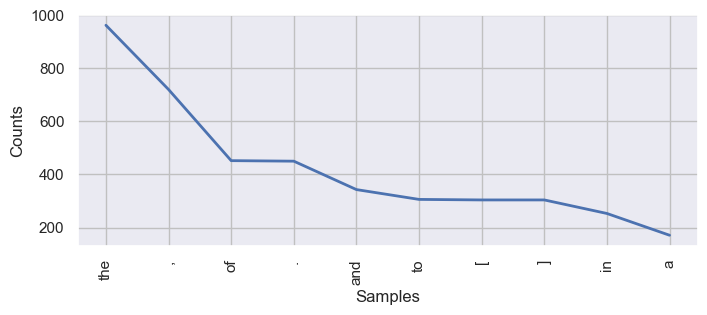

In [36]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## Stopwords

In [37]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'into', 'myself', 'shouldn', 'if', 'me', "she'd", "they'd", 'hadn', 'on', "should've", 'most', 'about', 'at', 'ours', "won't", 'above', "i'll", 'with', 've', 'ma', 'same', "mightn't", 'hasn', 'herself', 'doing', 'all', 'can', 'had', 'his', 'hers', 'o', "weren't", 'wouldn', 'your', 'shan', "hasn't", 'being', "they'll", "i'm", 's', 'as', 'he', 'in', 'doesn', "he'd", 'itself', 'having', 'ourselves', 'did', "we've", 'him', "we'd", "needn't", 'because', "you'd", 'such', 'needn', 'so', "she'll", 'under', 'aren', 'out', 'them', "we're", "she's", 'theirs', 'during', 'himself', "doesn't", 'our', 'below', 'those', 'been', 're', "it'd", 'will', "you'll", "you've", 'over', "that'll", 'against', 'why', 'of', "haven't", 'too', 'mustn', 'couldn', 'not', 'to', 'before', 'be', 'once', 'a', "they're", "we'll", 'when', 'after', 'nor', 'should', 'again', 'wasn', 'up', 'there', "it's", 'themselves', "isn't", 'from', 'mightn', 'was', 'by', 'more', 'between', 't', 'my', "he'll", 'for', "didn't", 'its', 'y',

In [38]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [39]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSpecial',
 'pages',
 'Search',
 'Search',
 'Appearance',
 'Donate',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Donate',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'ContributionsTalk',
 'Contents',
 'move',
 'sidebar',
 'hide',
 '(',
 'Top',
 ')',
 '1',
 'Historic',
 'events',
 '20th',
 'century',
 'Toggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection',
 '1.1',
 'World',
 'beginning',
 'century',
 '1.1.1',
 '``',
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914–1918',
 ')',
 '1.2',
 'Spanish',
 'flu',
 '1.2.1',
 'Russian',
 'Revolution',
 'communism',
 '1.3

In [40]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 3282 samples and 9432 outcomes>


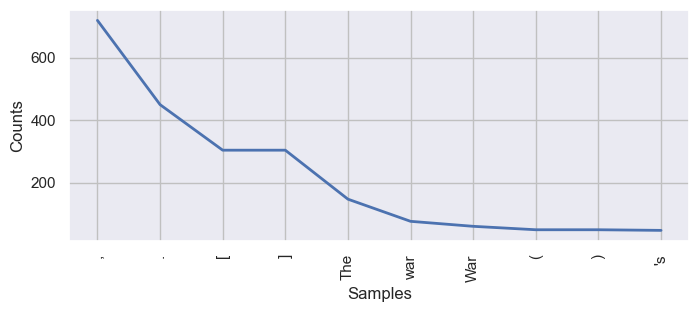

In [41]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [42]:
dist_words_filter

FreqDist({',': 720, '.': 450, '[': 304, ']': 304, 'The': 147, 'war': 76, 'War': 60, '(': 49, ')': 49, "'s": 47, ...})

In [43]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [44]:
sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSpecial    pages    Search    Search    Appearance    Donate    Create    account    Log    Personal    tools    Donate    Create    account    Log    Pages    logged    editors    learn    ContributionsTalk    Contents    move    sidebar    hide         Top              Historic    events      th    century    Toggle    Historic    events      th    century    subsection           World    beginning    century                   The    war    end    wars               World    War    I                                  Spanish    flu             Russian    Revolution    communism           Between    wars             Economic    depression             The    rise    dictato

In [45]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', '

In [46]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

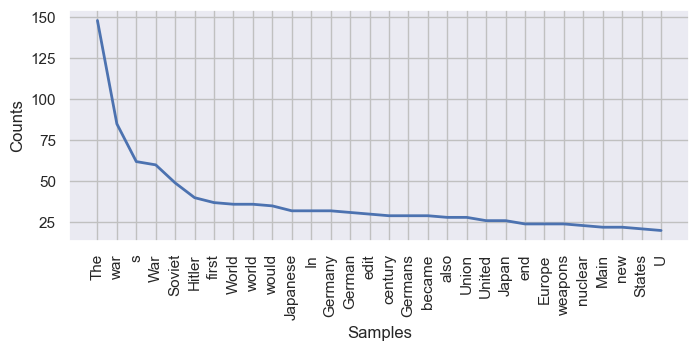

In [47]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [48]:
dist_words_filter_2.most_common(20)

[('The', 148),
 ('war', 85),
 ('s', 62),
 ('War', 60),
 ('Soviet', 49),
 ('Hitler', 40),
 ('first', 37),
 ('World', 36),
 ('world', 36),
 ('would', 35),
 ('Japanese', 32),
 ('In', 32),
 ('Germany', 32),
 ('German', 31),
 ('edit', 30),
 ('century', 29),
 ('Germans', 29),
 ('became', 29),
 ('also', 28),
 ('Union', 28)]

In [97]:
words_lower = [word.lower() for word in tokenized_word_2]
from nltk import FreqDist

dist_words_filter_3 = FreqDist(words_lower)
dist_words_filter_3.most_common(20)

[('the', 150),
 ('war', 145),
 ('s', 78),
 ('world', 72),
 ('soviet', 49),
 ('first', 40),
 ('hitler', 40),
 ('would', 35),
 ('in', 33),
 ('new', 33),
 ('japanese', 32),
 ('germany', 32),
 ('edit', 31),
 ('german', 31),
 ('century', 29),
 ('states', 29),
 ('germans', 29),
 ('became', 29),
 ('nuclear', 28),
 ('also', 28)]

## Lowercase & Group similar forms 

In [101]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/woodoooo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/woodoooo/nltk_data...


True

In [105]:
from textblob import Word
lemmas = [Word(w).lemmatize() for w in words_lower]
from nltk import FreqDist
dist_words_filter_4 = FreqDist(lemmas)
dist_words_filter_4.most_common(20)

[('war', 157),
 ('the', 150),
 ('s', 80),
 ('world', 72),
 ('german', 60),
 ('soviet', 53),
 ('first', 40),
 ('hitler', 40),
 ('state', 39),
 ('would', 35),
 ('in', 33),
 ('new', 33),
 ('japanese', 32),
 ('germany', 32),
 ('century', 31),
 ('edit', 31),
 ('became', 29),
 ('weapon', 29),
 ('u', 28),
 ('nuclear', 28)]

In [198]:
new_stopwords = ["the", "s", "would", "edit", "in", "new", "u", "also", "main", "th"]

In [199]:
filtered = []
for word in lemmas:
    if word not in new_stopwords:
        filtered.append(word)

In [200]:
from nltk import FreqDist

dist_words_final = FreqDist(filtered)
dist_words_final.most_common(20)

[('war', 157),
 ('world', 72),
 ('german', 60),
 ('soviet', 53),
 ('first', 40),
 ('hitler', 40),
 ('state', 39),
 ('japanese', 32),
 ('germany', 32),
 ('century', 31),
 ('became', 29),
 ('weapon', 29),
 ('nuclear', 28),
 ('force', 28),
 ('union', 28),
 ('attack', 28),
 ('computer', 28),
 ('nation', 27),
 ('battle', 27),
 ('united', 26)]

In [201]:
# After cleaning the text by removing stopwords, converting all words to lowercase, 
# and lemmatizing them to their base forms, I created a frequency distribution of the remaining tokens.
# This analysis produced the 20 most frequently used words in the text, 
# revealing the dominant historical themes and key entities mentioned throughout the 20th-century narrative.

###  Summary of Most Frequent Words

In [202]:
# The 20 most frequently used words highlight the dominant historical themes of the twentieth century.
# Terms like “war,” “world,” “battle,” “attack,” “force,” and “weapon” emphasize the prevalence of global conflicts, 
# particularly the two World Wars and the subsequent rise of military power.
# Words such as “german,” “soviet,” “japanese,” “union,” and “united” reflect the key nations and alliances shaping 
# international relations during this period.
# Meanwhile, terms like “nuclear,” “computer,” and “state” point to significant technological and 
# political developments — from the nuclear age to the digital revolution and the expansion of state governance.

# Overall, the frequency distribution reveals a century characterized by warfare, power dynamics, 
# and technological progress that defined modern world history.

## POS Tags with TextBlob

In [247]:
%%time
text = TextBlob(" ".join(filtered))

CPU times: user 1.03 ms, sys: 68 μs, total: 1.1 ms
Wall time: 1.11 ms


In [248]:
text

TextBlob("key event century wikipedia jump content menu menu move sidebar hide navigation pagecontentscurrent eventsrandom articleabout wikipediacontact contribute helplearn editcommunity portalrecent changesupload filespecial page search search appearance donate create account log personal tool donate create account log page logged editor learn contributionstalk content move sidebar hide top historic event century toggle historic event century subsection world beginning century war end war world war i spanish flu russian revolution communism between war economic depression rise dictatorship global war world war ii war europe blitzkrieg operation barbarossa turning tide operation overlord final day war pacific background japanese expansion allied offensive final day holocaust nuclear age begin post war world end empire decolonization cold war war proxy space race end cold war information communication technology world end century see reference source external link toggle table content 

In [249]:
tags_list = text.tags

In [250]:
tags_list

[('key', 'JJ'),
 ('event', 'NN'),
 ('century', 'NN'),
 ('wikipedia', 'VBD'),
 ('jump', 'NN'),
 ('content', 'NN'),
 ('menu', 'NN'),
 ('menu', 'NN'),
 ('move', 'NN'),
 ('sidebar', 'NN'),
 ('hide', 'NN'),
 ('navigation', 'NN'),
 ('pagecontentscurrent', 'NN'),
 ('eventsrandom', 'NN'),
 ('articleabout', 'IN'),
 ('wikipediacontact', 'JJ'),
 ('contribute', 'NN'),
 ('helplearn', 'NN'),
 ('editcommunity', 'NN'),
 ('portalrecent', 'NN'),
 ('changesupload', 'NN'),
 ('filespecial', 'JJ'),
 ('page', 'NN'),
 ('search', 'NN'),
 ('search', 'NN'),
 ('appearance', 'NN'),
 ('donate', 'NN'),
 ('create', 'NN'),
 ('account', 'NN'),
 ('log', 'VBD'),
 ('personal', 'JJ'),
 ('tool', 'NN'),
 ('donate', 'NN'),
 ('create', 'NN'),
 ('account', 'NN'),
 ('log', 'JJ'),
 ('page', 'NN'),
 ('logged', 'VBD'),
 ('editor', 'NN'),
 ('learn', 'NN'),
 ('contributionstalk', 'NN'),
 ('content', 'JJ'),
 ('move', 'NN'),
 ('sidebar', 'NN'),
 ('hide', 'NN'),
 ('top', 'JJ'),
 ('historic', 'JJ'),
 ('event', 'NN'),
 ('century', 'NN'),


In [251]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [252]:
df_text.head()

,Words,Word type
0,key,JJ
1,event,NN
2,century,NN
3,wikipedia,VBD
4,jump,NN


In [253]:
df_t = df_text.groupby('Word type').count().reset_index()

In [254]:
df_t.head()

,Word type,Words
0,CD,74
1,DT,49
2,FW,12
3,IN,188
4,JJ,1547


In [291]:
top10 = df_t.nlargest(10, 'Words')

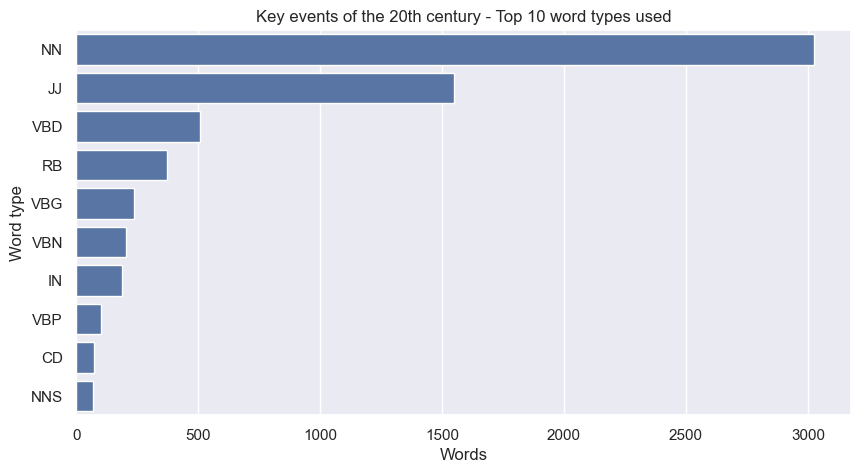

In [294]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x="Words",
    y="Word type",
    data=top10
)
ax.set_title("Key events of the 20th century - Top 10 word types used")
plt.show()

## Nouns

In [297]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [298]:
top15

,Word,Occurences
1164,war,157
1190,world,72
1029,state,39
495,hitler,39
176,century,31
1134,union,28
217,computer,28
94,battle,27
722,nation,27
413,force,26


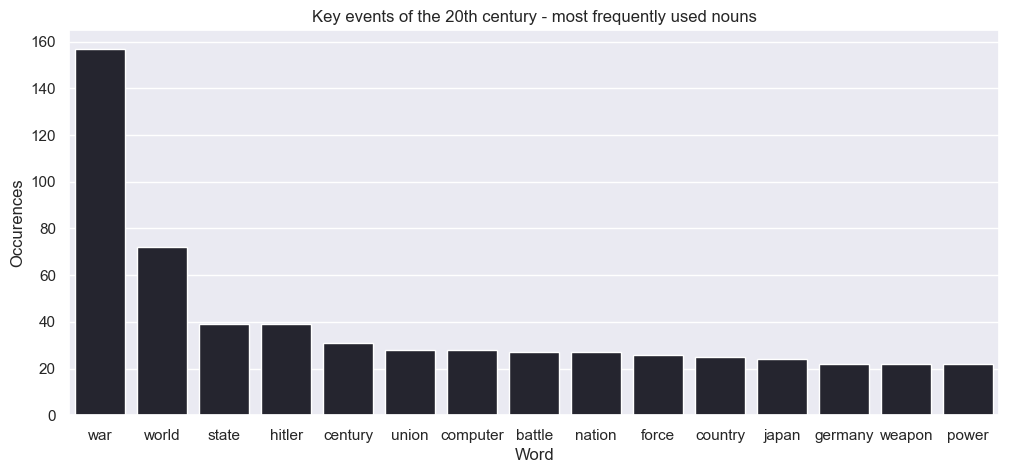

In [300]:
plt.figure(figsize=(12, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("Key events of the 20th century - most frequently used nouns")

## Verbs

In [301]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [302]:
top15

,Word,Occurences
27,became,29
162,led,14
28,began,13
41,came,12
170,made,10
159,launched,8
285,took,7
288,turned,7
44,caused,6
135,held,6


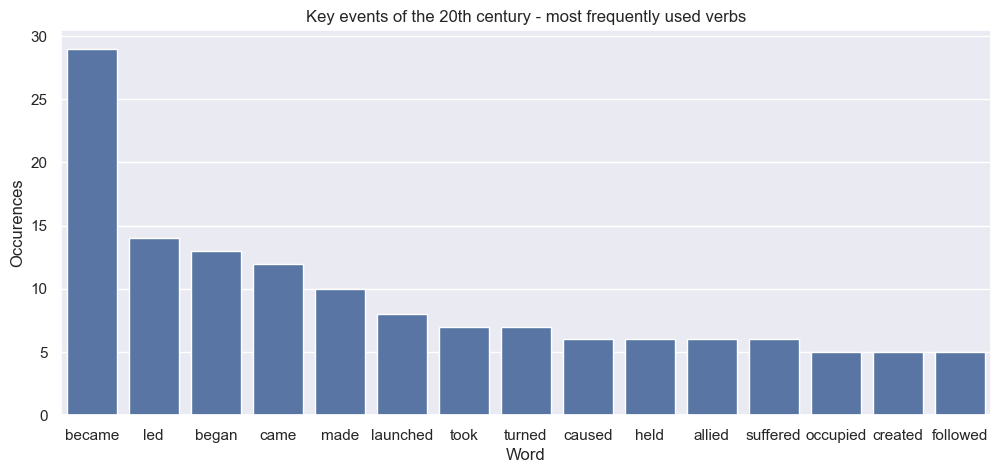

In [304]:
# Create the plot
plt.figure(figsize=(12, 5))
sns.barplot(
    x="Word",
    y="Occurences",
    data=top15
)

# Add title
plt.title("Key events of the 20th century - most frequently used verbs")
plt.show()

## Adjectives

In [305]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [306]:
top15

,Word,Occurences
265,german,59
580,soviet,53
341,japanese,32
441,nuclear,28
387,many,24
656,united,23
230,first,19
81,british,19
24,american,19
183,economic,14


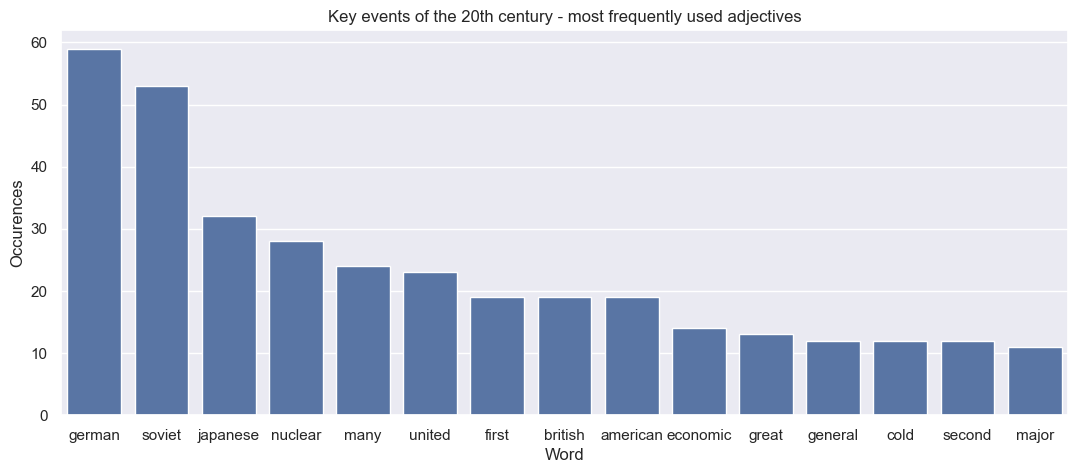

In [309]:
# Create the plot
plt.figure(figsize=(13, 5))
sns.barplot(
    x="Word",
    y="Occurences",
    data=top15
)

# Add title
plt.title("Key events of the 20th century - most frequently used adjectives")
plt.show()

In [310]:
# What stands out most in these frequencies is how strongly they reflect the dominant forces that shaped the twentieth century — 
# war, nations, and power.

# The nouns (war, world, state, union, nation, force) show that global conflict and political structures were central themes — 
# the century was defined by wars and the emergence or collapse of powerful states and alliances.

# The verbs (became, led, began, made, launched) emphasize change and action, suggesting a period marked by transformation, 
# leadership, and innovation.

# The adjectives (german, soviet, japanese, nuclear, british, american) reveal the key actors and 
# technologies driving world events — major nations and the rise of nuclear power.

# What stands out is how the language of the text mirrors history itself — 
# a century dominated by wars, nations, and technological advancement, 
# all interconnected through constant movement and transformation.

## Counting country names occurences

In [266]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

key event century wikipedia jump content menu menu move sidebar hide navigation pagecontentscurrent eventsrandom articleabout wikipediacontact contribute helplearn editcommunity portalrecent changesupload filespecial page search search appearance donate create account log personal tool donate create account log page logged editor learn contributionstalk content move sidebar hide top historic event century toggle historic event century subsection world beginning century war end war world war i spanish flu russian revolution communism between war economic depression rise dictatorship global war world war ii war europe blitzkrieg operation barbarossa turning tide operation overlord final day war pacific background japanese expansion allied offensive final day holocaust nuclear age begin post war world end empire decolonization cold war war proxy space race end cold war information communication technology world end century see reference source external link toggle table content key event 

In [311]:
# Create a count for countries

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [268]:
all_counts

Counter({'war': 157,
         'world': 72,
         'german': 60,
         'soviet': 53,
         'first': 40,
         'hitler': 40,
         'state': 39,
         'japanese': 32,
         'germany': 32,
         'century': 31,
         'became': 29,
         'weapon': 29,
         'nuclear': 28,
         'force': 28,
         'union': 28,
         'attack': 28,
         'computer': 28,
         'nation': 27,
         'battle': 27,
         'united': 26,
         'japan': 26,
         'country': 25,
         'end': 24,
         'europe': 24,
         'many': 24,
         'ally': 23,
         'day': 22,
         'power': 22,
         'army': 21,
         'allied': 20,
         'article': 20,
         'this': 20,
         'ii': 19,
         'british': 19,
         'american': 19,
         'one': 19,
         'however': 19,
         'people': 19,
         'two': 18,
         'could': 18,
         'space': 17,
         'jew': 17,
         'later': 17,
         'stalin': 16,
         'on':

In [269]:
countries = pd.read_csv("List of Countries_2.0.csv", index_col = 0)

In [270]:
countries.head()

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


In [319]:
# lowercase country names
countries_list = [c.lower() for c in countries['Country'].to_list()]

In [320]:
dict_of_counts = {d : all_counts[d] for d in countries_list}

In [321]:
dict_of_counts

{'afghanistan': 0,
 'albania': 2,
 'algeria': 1,
 'andorra': 0,
 'angola': 1,
 'antigua and barbuda': 0,
 'argentina': 0,
 'armenia': 0,
 'australia': 2,
 'austria': 4,
 'azerbaijan': 0,
 'bahamas': 0,
 'bahrain': 0,
 'bangladesh': 2,
 'barbados': 0,
 'belarus': 1,
 'belgium': 2,
 'belize': 0,
 'benin': 0,
 'bhutan': 0,
 'bolivia': 0,
 'bosnia and herzegovina': 0,
 'botswana': 0,
 'brazil': 0,
 'brunei': 0,
 'bulgaria': 1,
 'burkina faso': 0,
 'burundi': 0,
 'cabo verde': 0,
 'cambodia': 2,
 'cameroon': 0,
 'canada': 2,
 'central african republic': 0,
 'chad': 0,
 'chile': 0,
 'china': 9,
 'colombia': 0,
 'comoros': 0,
 'costa rica': 0,
 "côte d'ivoire": 0,
 'croatia': 0,
 'cuba': 3,
 'cyprus': 0,
 'czechia': 0,
 'democratic republic of the congo': 0,
 'denmark': 2,
 'djibouti': 0,
 'dominica': 0,
 'dominican republic': 0,
 'ecuador': 0,
 'egypt': 2,
 'el salvador': 0,
 'equatorial guinea': 0,
 'eritrea': 0,
 'estonia': 2,
 'eswatini': 0,
 'ethiopia': 0,
 'fiji': 0,
 'finland': 2,
 'fr

In [322]:
# Search for the countries from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [323]:
df

,afghanistan,albania,algeria,andorra,angola,antigua and barbuda,argentina,armenia,australia,austria,...,united states,uruguay,uzbekistan,vanuatu,vatican city,venezuela,vietnam,yemen,zambia,zimbabwe
0,0,2,1,0,1,0,0,0,2,4,...,0,0,0,0,0,0,8,0,0,0


In [324]:
df = df.transpose().reset_index()

In [325]:
df.dtypes

index    object
0         int64
dtype: object

In [326]:
df.head()

,index,0
0,afghanistan,0
1,albania,2
2,algeria,1
3,andorra,0
4,angola,1


In [327]:
df.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [328]:
df.head()

,Country,Times mentioned
0,afghanistan,0
1,albania,2
2,algeria,1
3,andorra,0
4,angola,1


In [329]:
df.shape

(195, 2)

In [330]:
df = df.groupby("Country")["Times mentioned"].sum().reset_index()

In [331]:
df_top10 = df.sort_values("Times mentioned", ascending=False).head(10)

In [332]:
df_top10.head(10)

,Country,Times mentioned
63,germany,32
83,japan,26
59,france,14
137,poland,12
35,china,9
81,italy,8
191,vietnam,8
142,russia,7
75,india,6
9,austria,4


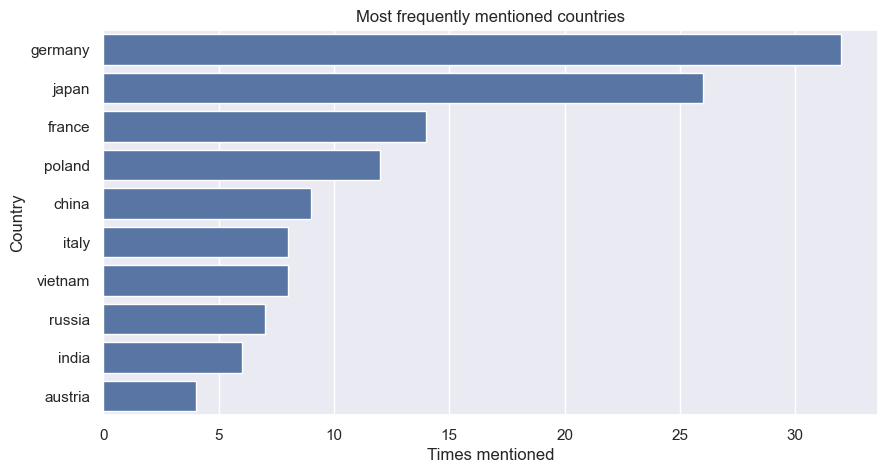

In [333]:
# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x="Times mentioned",
    y="Country",
    data=df_top10
)

# Add title
ax.set_title("Most frequently mentioned countries")
plt.show()

In [336]:
# The frequency distribution of country mentions highlights the key players in twentieth-century global history. 
# Germany stands out with the highest number of mentions, followed by Japan, France, Poland, and China — 
# all nations that were central to major conflicts and geopolitical events such as the two World Wars and their aftermath.

# The appearance of Vietnam and Russia points to the importance of later Cold War–era conflicts and ideological divisions, 
# while India and Austria reflect the broader global reach of historical developments, 
# from decolonization to shifting European alliances.

# Overall, the plot clearly shows that the narrative of the twentieth century is dominated by countries involved in wars, 
# reconstruction, and ideological rivalry, with Europe and Asia emerging as the main centers of historical activity.

In [334]:
df_top10.to_csv("top10_mentioned_countries.csv")

In [335]:
df.to_csv("mentioned_countries.csv")

## Sentiment Analysis

In [337]:
text_sent = TextBlob(str(filtered))

In [338]:
print(text_sent.sentiment)

Sentiment(polarity=0.0317773988764555, subjectivity=0.33937400387872074)


In [339]:
# Polarity = 0.041 → this is very close to 0, meaning the text is basically neutral (slightly leaning positive, but tiny).

# Subjectivity = 0.34 indicates a moderately objective text. It’s not purely factual (like a data table), 
# but it doesn’t express strong personal opinions either — typical for historical or encyclopedic writing.